In [2]:
# Εισαγωγή βιβλιοθηκών

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime
import wordcloud 
from collections import Counter
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


     |████████████████████████████████| 133kB 2.7MB/s 


In [3]:
df_reuters = pd.read_csv('reuters.csv', encoding= 'utf-8-sig')
df_reuters.head()

,web-scraper-order,web-scraper-start-url,post,post-href,title,body,date
0,1593329829-72633,https://www.reuters.com/news/archive/businessn...,Nissan stops production at UK factory over cor...,https://www.reuters.com/article/us-health-coro...,Nissan stops production at UK factory over cor...,Workers are seen on the production line at Nis...,"March 17, 2020"
1,1593339950-76232,https://www.reuters.com/news/archive/businessn...,Billionaire Icahn exits Hertz with 'significan...,https://www.reuters.com/article/us-hertz-glo-h...,Billionaire Icahn exits Hertz with 'significan...,FILE PHOTO: Billionaire activist-investor Carl...,"May 28, 2020"
2,1593331105-73193,https://www.reuters.com/news/archive/businessn...,Walmart's Mexico unit says CFO to step down,https://www.reuters.com/article/us-mexico-walm...,Walmart's Mexico unit says CFO to step down,"Olga Gonzalez, newly appointed CFO of Walmex, ...","March 25, 2020"
3,1593340116-76304,https://www.reuters.com/news/archive/businessn...,Wall Street ends down in late selloff; Faceboo...,https://www.reuters.com/article/us-usa-stocks/...,Wall Street ends down in late selloff; Faceboo...,(Reuters) - Wall Street ended lower on Thursda...,"May 28, 2020"
4,1593329639-72549,https://www.reuters.com/news/archive/businessn...,Norwegian Air to cancel 85% of flights and lay...,https://www.reuters.com/article/us-health-coro...,Norwegian Air to cancel 85% of flights and lay...,OSLO (Reuters) - Norwegian Air (NWC.OL) will c...,"March 16, 2020"


In [4]:
# Αφαίρεση στηλών

df_reuters.drop(columns=['web-scraper-order', 'web-scraper-start-url', 'post', 'post-href'], axis = 1, inplace=True)

In [5]:
# Καθάρισμα δεδομένων από NaN values

df_reuters.isnull().sum()
missing_values = ["n/a", "na", "NaN", "--", 999, 9999]   
df_reuters.replace(to_replace = missing_values, value = np.nan, inplace = True)
df_reuters.dropna(inplace=True) 
df_reuters.head()
df_reuters.shape

(5769, 3)

In [6]:
# Μετατροπή της ημερομηνίας από object σε datetime σε νέα στήλη

print(df_reuters.dtypes)
df_reuters['Datetime'] = pd.to_datetime(df_reuters['date'], format="%B %d, %Y")
print(df_reuters.dtypes)
df_reuters.sort_values('Datetime', ascending=True).head()

title    object
body     object
date     object
dtype: object
title               object
body                object
date                object
Datetime    datetime64[ns]
dtype: object


,title,body,date,Datetime
4374,Qualcomm says China virus threatens phone indu...,(This February 5 story corrects number of 5G l...,"February 5, 2020",2020-02-05
552,Take Five: The virus data fog,LONDON (Reuters) - A worker with sanitizing e...,"February 28, 2020",2020-02-28
1710,Wall Street Weekahead: Main Street leans towar...,NEW YORK (Reuters) - Vermont Senator Bernie Sa...,"February 28, 2020",2020-02-28
3139,Venezuela revamps PDVSA leadership after Madur...,FILE PHOTO: State oil company PDVSA's logo is ...,"February 29, 2020",2020-02-29
1307,USTR vows to push for trade deals with Britain...,WASHINGTON (Reuters) - The Trump administratio...,"February 29, 2020",2020-02-29


In [7]:
df_reuters['year'] = pd.DatetimeIndex(df_reuters['Datetime']).year
df_reuters['month'] = pd.DatetimeIndex(df_reuters['Datetime']).month
df_reuters['day'] = pd.DatetimeIndex(df_reuters['Datetime']).day

In [8]:
# Καθάρισμα δεδομένων από περιττά κείμενα

keywords = ['covid', 'COVID','Covid', 'coronavirus', 'lockdown', 'virus', 'SARS', 'pandemic']
df_data = pd.DataFrame(df_reuters[df_reuters.apply(lambda x: any([word in x['title'] or word in x['body'] for word in keywords]), axis=1)])
df_data.reset_index(inplace = True)
print(df_data)

      index                                              title  ... month day
0         0  Nissan stops production at UK factory over cor...  ...     3  17
1         1  Billionaire Icahn exits Hertz with 'significan...  ...     5  28
2         3  Wall Street ends down in late selloff; Faceboo...  ...     5  28
3         4  Norwegian Air to cancel 85% of flights and lay...  ...     3  16
4         5  Pfizer to outsource some drug production, focu...  ...     5   9
...     ...                                                ...  ...   ...  ..
4718   5764  Senator sees U.S. sticking to trade deal with ...  ...     5  28
4719   5765    Exclusive: Oil major BP to cut 15% of workforce  ...     6   8
4720   5768  China's Great Wall expects mild domestic auto ...  ...     5  25
4721   5769  Uber suspends taxi booking option in Saudi Arabia  ...     3  20
4722   5770  Exxon plays on virus worries in Baytown contra...  ...     4   4

[4723 rows x 8 columns]


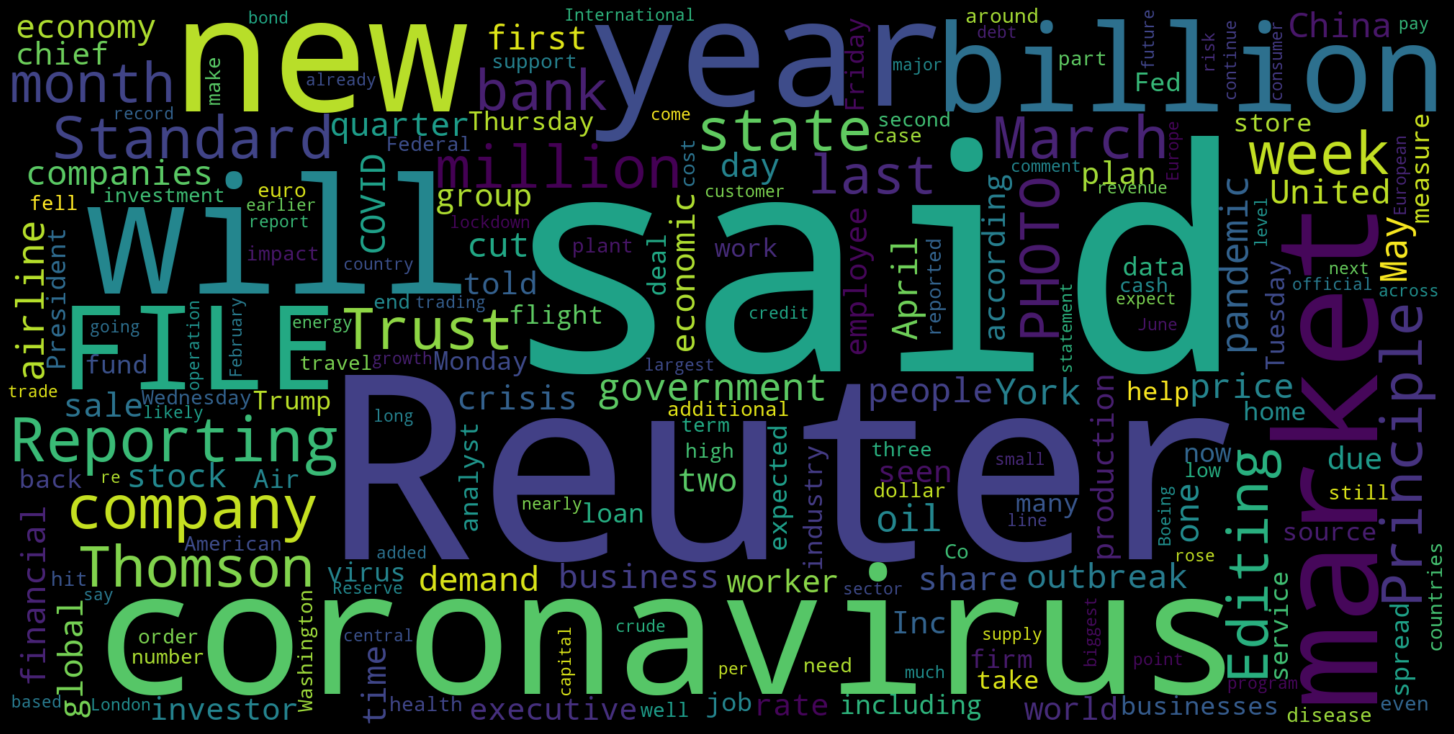

In [9]:
# Οπτικοποίηση λέξεων σε wordcloud

text = ' '.join(df_data['body'])

wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    collocations=False,
    stopwords=STOPWORDS
 ).generate(text)

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [10]:
# Ανάλυση συναισθήματος

analyser = SentimentIntensityAnalyzer()

In [11]:
df_data['sentTitle'] = df_data['body'].apply(lambda x : analyser.polarity_scores(x)['compound'])
df_data.head()

,index,title,body,date,Datetime,year,month,day,sentTitle
0,0,Nissan stops production at UK factory over cor...,Workers are seen on the production line at Nis...,"March 17, 2020",2020-03-17,2020,3,17,0.2195
1,1,Billionaire Icahn exits Hertz with 'significan...,FILE PHOTO: Billionaire activist-investor Carl...,"May 28, 2020",2020-05-28,2020,5,28,0.9289
2,3,Wall Street ends down in late selloff; Faceboo...,(Reuters) - Wall Street ended lower on Thursda...,"May 28, 2020",2020-05-28,2020,5,28,0.9412
3,4,Norwegian Air to cancel 85% of flights and lay...,OSLO (Reuters) - Norwegian Air (NWC.OL) will c...,"March 16, 2020",2020-03-16,2020,3,16,0.7935
4,5,"Pfizer to outsource some drug production, focu...",(This May 8 story corrects to delete word “int...,"May 9, 2020",2020-05-09,2020,5,9,0.9826


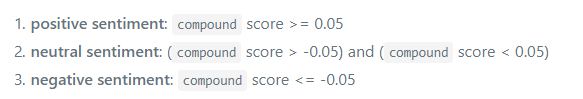

In [12]:
df_data.dtypes

index                 int64
title                object
body                 object
date                 object
Datetime     datetime64[ns]
year                  int64
month                 int64
day                   int64
sentTitle           float64
dtype: object

In [13]:
# Οπτικοποίηση των δεδομένων ανά ημέρα, εβδομάδα και μήνα ομαδοποιώντας μέσω resample

copy = df_data[df_data['month'] > 2].sort_values('Datetime', ascending=True).copy()
plt.style.use('ggplot')
copy.set_index('Datetime' , inplace=True)

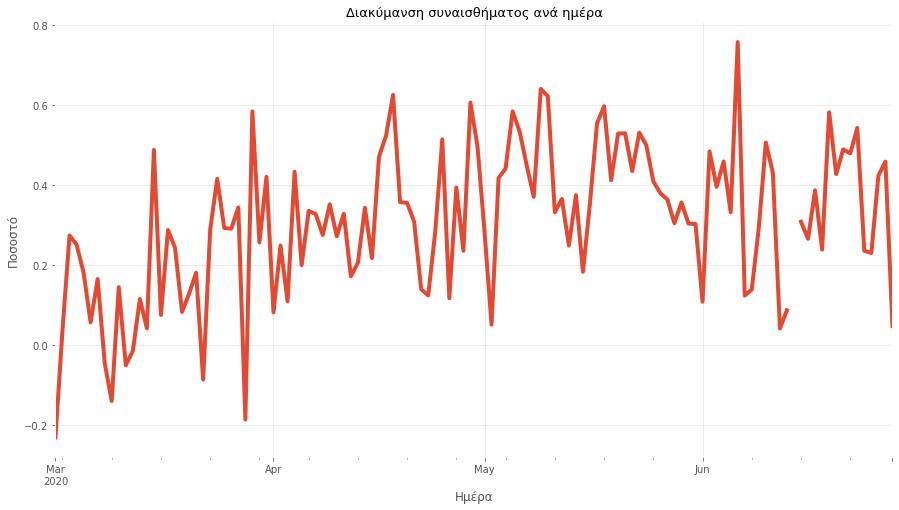

In [14]:
# calendar day frequency
ax = copy.resample('D').mean().plot(y='sentTitle', figsize=(15, 8), linewidth=4, legend=False)
plt.title('Διακύμανση συναισθήματος ανά ημέρα', fontsize=13)
plt.xlabel('Ημέρα')
plt.ylabel('Ποσοστό')
ax.set_facecolor('#fff')
ax.grid(color ='#d7d9d7', linewidth=0.5)

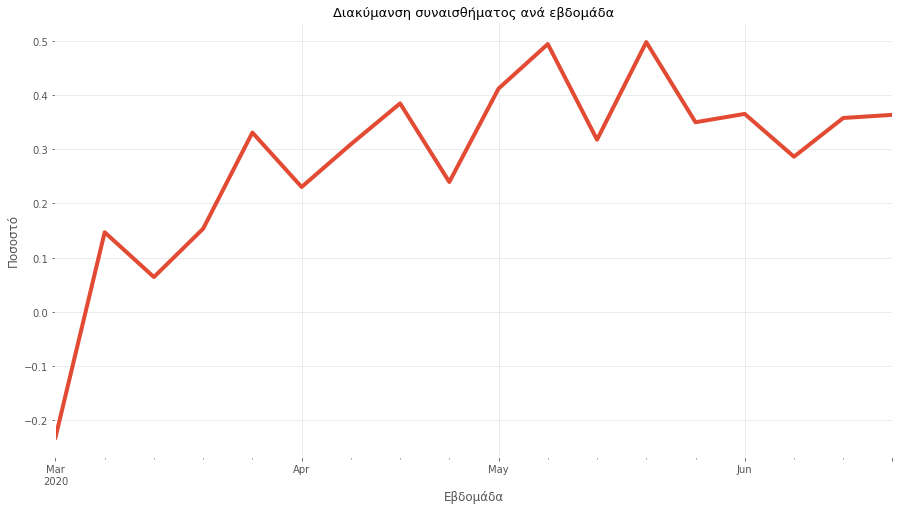

In [15]:
# weekly frequency
ax = copy.resample('W').mean().plot(y='sentTitle', figsize=(15, 8),linewidth=4, legend=False)
plt.title('Διακύμανση συναισθήματος ανά εβδομάδα', fontsize=13)
plt.xlabel('Εβδομάδα')
plt.ylabel('Ποσοστό')
ax.set_facecolor('#fff')
ax.grid(color ='#d7d9d7', linewidth=0.5)

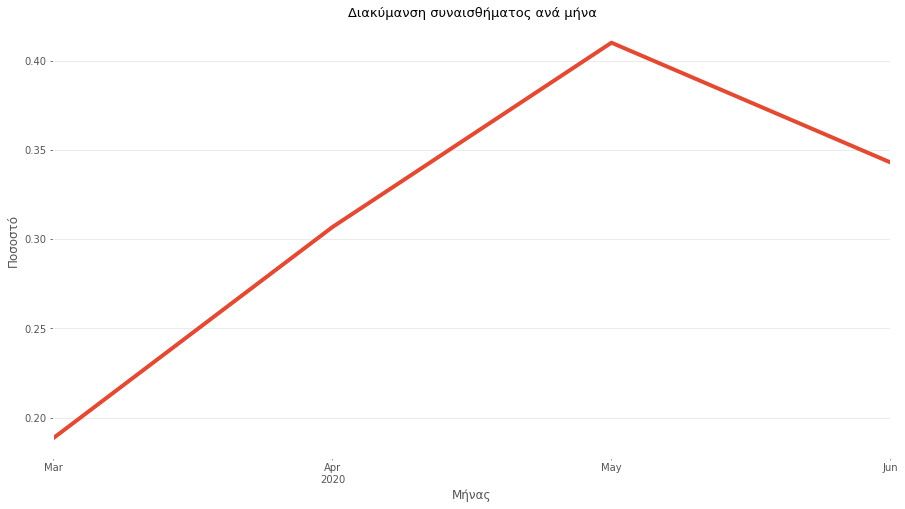

In [16]:
# month end frequency
ax = copy.resample('M').mean().plot(y='sentTitle', figsize=(15, 8),linewidth=4, legend=False)
plt.title('Διακύμανση συναισθήματος ανά μήνα', fontsize=13)
plt.xlabel('Μήνας')
plt.ylabel('Ποσοστό')
ax.set_facecolor('#fff')
ax.grid(color ='#d7d9d7', linewidth=0.5)

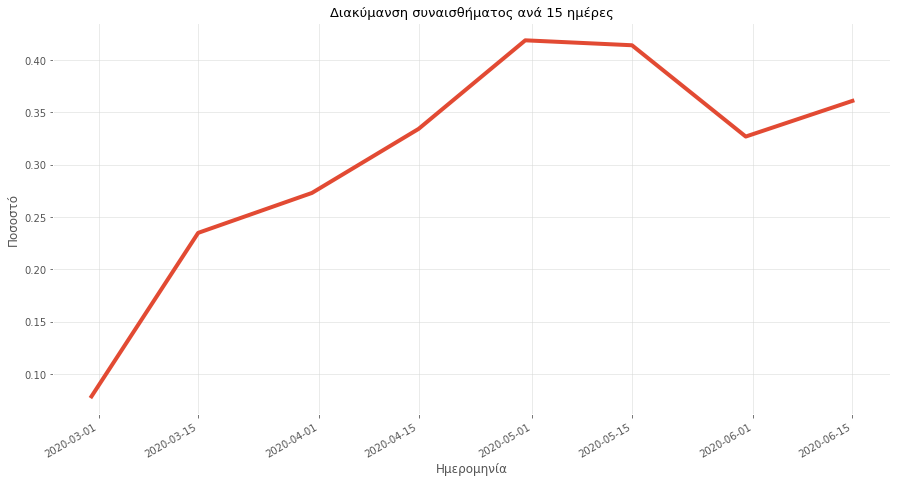

In [17]:
# semi-month end frequency
ax = copy.resample('SM').mean().plot(y='sentTitle', figsize=(15, 8), linewidth=4, legend=False)
plt.title('Διακύμανση συναισθήματος ανά 15 ημέρες', fontsize=13)
plt.xlabel('Ημερομηνία')
plt.ylabel('Ποσοστό')
ax.set_facecolor('#fff')
ax.grid(color ='#d7d9d7', linewidth=0.5)

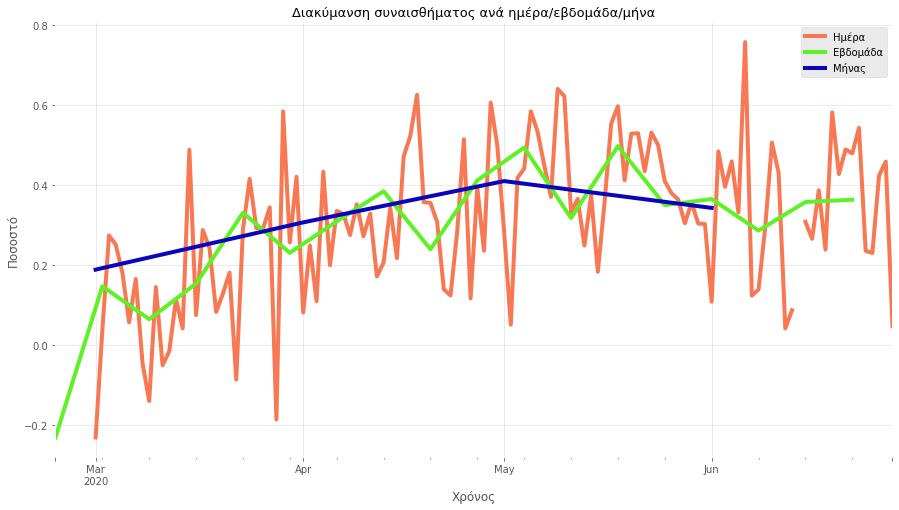

In [18]:
ax = copy.resample('D').mean().plot(y='sentTitle', figsize=(15, 8), color='#f77852',linewidth=4, label='Ημέρα' )
copy.resample('W').mean().plot(y='sentTitle', figsize=(15, 8), ax = ax, color ='#5ef224', linewidth=4, label='Εβδομάδα')
copy.resample('M').mean().plot(y='sentTitle', figsize=(15, 8),ax = ax, color = '#0a04bd', linewidth=4, label='Μήνας')
plt.title('Διακύμανση συναισθήματος ανά ημέρα/εβδομάδα/μήνα', fontsize=13)
plt.xlabel('Χρόνος')
plt.ylabel('Ποσοστό')
ax.set_facecolor('#fff')
ax.grid(color ='#d7d9d7', linewidth=0.5)

In [19]:
import re
import string
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [20]:
df_data.body = [str (item) for item in df_data['body']]

df_data['tokenized'] = df_data['body'].map(lambda x: clean_text(x))

474.25492271861106


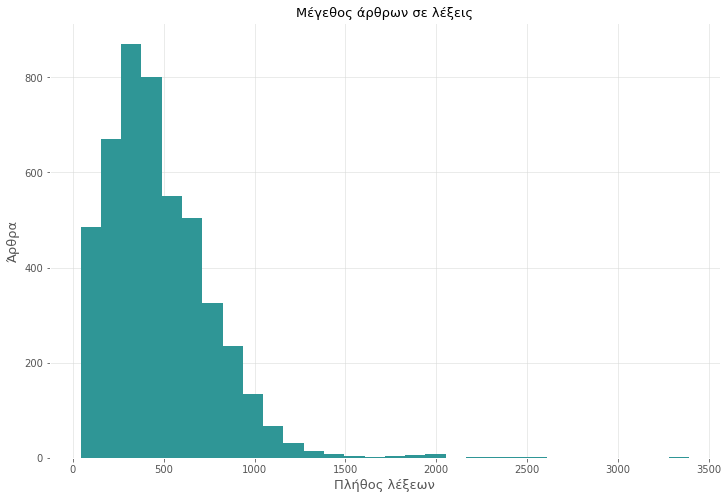

In [26]:
df_data['word_count'] = df_data['body'].apply(lambda x: len(x.split()))
print(df_data['word_count'].mean())
ax=df_data['word_count'].plot(kind='hist', color = '#2f9696', bins=30, fontsize=10, figsize=(12,8))
ax.set_title('Μέγεθος άρθρων σε λέξεις', fontsize=13)
ax.set_ylabel('Άρθρα', fontsize=13)
ax.set_xlabel('Πλήθος λέξεων', fontsize=13)
ax.set_facecolor('#fff')
ax.grid(color ='#d7d9d7', linewidth=0.5)

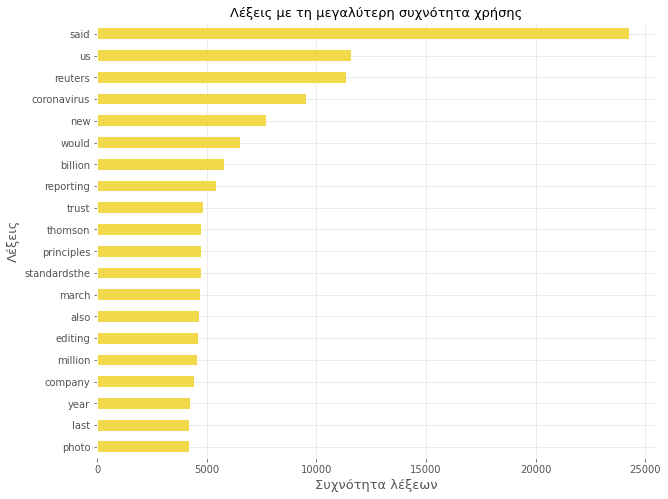

In [22]:
# Bρίσκουμε τις πιο συχνές λέξεις

wd_counts = Counter()
for i, row in df_data.iterrows():
      wd_counts.update(row['tokenized'].split())
for sw in stopwords.words('english'):
    del wd_counts[sw]
df = pd.DataFrame(wd_counts.most_common(20), columns=['word', 'count'])
ax = df.sort_values('count', ascending=True).plot(x='word', kind='barh', color = '#f2d949', figsize=(10,8), legend=False)
plt.title('Λέξεις με τη μεγαλύτερη συχνότητα χρήσης', fontsize=13)
plt.xlabel('Συχνότητα λέξεων', fontsize=13)
plt.ylabel('Λέξεις', fontsize=13)
ax.set_facecolor('#fff')
ax.grid(color ='#d7d9d7', linewidth=0.5)

In [23]:
# lemmatization

from textblob import Word
df_data['lemmatized'] = df_data['tokenized'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_data['lemmatized'].head()

0    worker are seen on the production line at niss...
1    file photo billionaire activistinvestor carl i...
2    reuters wall street ended lower on thursday fo...
3    oslo reuters norwegian air nwcol will cancel 8...
4    this may 8 story corrects to delete word intra...
Name: lemmatized, dtype: object

In [24]:
# Έλεγχος λέξεων από το συναισθηματικό λεξικό

import re
filepath = "NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()

print(emolex_df.head(4))
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm= None ) 
matrix = vec.fit_transform(df_data['lemmatized'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

FileNotFoundError: ignored

In [ ]:
positive_words = emolex_df[emolex_df.positive == 1]['word']
negative_words = emolex_df[emolex_df.negative == 1]['word']

df_data['positive'] = wordcount_df[positive_words].sum(axis=1)
df_data['negative'] = wordcount_df[negative_words].sum(axis=1)

In [ ]:
# Διάγραμμα

copy = df_data.sort_values('Datetime', ascending=True).copy()
plt.style.use('ggplot')
copy.set_index('Datetime' , inplace=True)

# month end frequency
ax = copy['positive'].resample('W').mean().plot(figsize=(16,4), color = '#47a169', linewidth=4, label='θετικό')
copy['negative'].resample('W').mean().plot(figsize=(16,4), ax = ax, label = 'αρνητικό', color = '#b03921', linewidth=4)
plt.title('Πόλωση συναισθήματος ανά μήνα', fontsize=13 )
plt.xlabel('Μήνες')
plt.ylabel('')
plt.legend()
ax.set_facecolor('#fff')
ax.grid(color ='#d7d9d7', linewidth=0.5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words= STOPWORDS, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df_data['body']) 

results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

# Ομοιότητα κειμένων

from sklearn.metrics.pairwise import cosine_similarity
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

# Φτιάχνουμε DataFrame με το αποτέλεσμα του cosine_similarity
plt_df = pd.DataFrame(arr)

# Εύρεση των κορυφαίων 20 ομοιοτήτων
# Δημιουργώ έναν πίνακα με τα scores. Κάθε γραμμή περιέχει το index της γραμμής
# από το plt_df καθώς και το άρθροισμα των 20 άρθρων με το μεγαλύτερο similarity
scores = []
for index, row in plt_df.iterrows():
  scores.append({ 'i' : index, 'similarity_score': row.sort_values(ascending = False).head(20).sum()})

# Φτιάχνω DataFrame με τα scores για να κάνω πράξεις
scores = pd.DataFrame(scores)
# Παίρνω τα 20 με το μεγαλύτερο score
top20scores = scores.sort_values('similarity_score', ascending=False).head(20)

# Από το plt_df παίρνω τα άρθρα που το index τους είναι μέσα στο top20scores
# καθώς και ΜΟΝΟ τις στήλες που επίσης είναι στα 20 κορυφαία
top20similar =  plt_df.loc[list(top20scores['i'])][list(top20scores.head(20)['i'])]

# Plot για το άρθρο με τις μεγαλύτερες ομοιότητες με τα άλλα άρθρα (στη θέση 0)
top20similar_tmp = top20similar.copy()
dict = {}
for col in top20similar_tmp.columns:
  dict.update({col : '#' + str(col) + ' ' + df_data.loc[col]['title']}) # αντιστοίχιση του index με τον τίτλο 

top20similar_tmp = top20similar_tmp.rename(columns=dict)
ax = top20similar_tmp.iloc[0].sort_values(ascending=True).plot(kind = 'barh', figsize=(8, 8))
ax.set_facecolor('#fff')
ax.grid(color ='#d7d9d7', linewidth=0.5)
plt.title('Ομοιότητα του άρθρου #2799 σε σύγκριση με άλλα άρθρα', fontsize=13)
plt.xlabel('Cosine similarity')

# Plot με τα 20 κορυφαία σε ομοιότητα άρθρα
plt.figure(figsize=(15,12))
sns.heatmap(top20similar, annot=True, cmap=plt.cm.Reds)
plt.title('Ομοιότητα περιεχομένου στα άρθρα', fontsize=13)
plt.show()
